check czt nrg issue:

In [25]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

In [26]:
file = '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/Run239_snippet/1st_hour/All_r239_1sthour_combined.CUD.h5'
f = h5py.File(file,'r')

In [27]:
f.keys()

<KeysViewHDF5 ['Events']>

In [28]:
Czt_nrg = f['Events/CZT/Energy'][...]
Czt_nrg_arr = Czt_nrg
Czt_nrg_sum_arr= Czt_nrg.sum(axis = tuple(range(1,3)) )
Czt_nrg_arr.shape

(2469305, 16, 16)

In [29]:
Czt_nrg_sum_arr.shape

(2469305,)

In [30]:
czt_evtid = f['Events/CZT/EventID'][...]

In [50]:
tindex =np.where(Czt_nrg_sum_arr==0)
CZT_nrg_chk = Czt_nrg_sum_arr[tindex]
CZT_nrg_chk_id = czt_evtid[tindex]

In [51]:
CZT_nrg_chk.shape, CZT_nrg_chk_id.shape

((82388,), (82388,))

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 82388.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([-0.5       , -0.47999999, -0.46000001, -0.44      , -0.41999999,
        -0.40000001, -0.38      , -0.36000001, -0.34      , -0.31999999,
        -0.30000001, -0.28      , -0.25999999, -0.23999999, -0.22      ,
        -0.2       , -0.18000001, -0.16      , -0.14      , -0.12      ,
        -0.1       , -0.08      , -0.06      , -0.04      , -0.02      ,
         0.        ,  0.02      ,  0.04      ,  0.06      ,  0.08      ,
         0.1       ,  0.12      ,  0.14      ,  0.16      ,  0.18000001,
         0.2       ,  0.22     

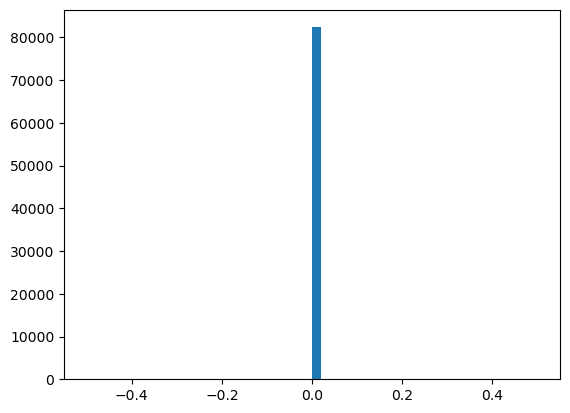

In [52]:

plt.hist(CZT_nrg_chk,bins=50)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

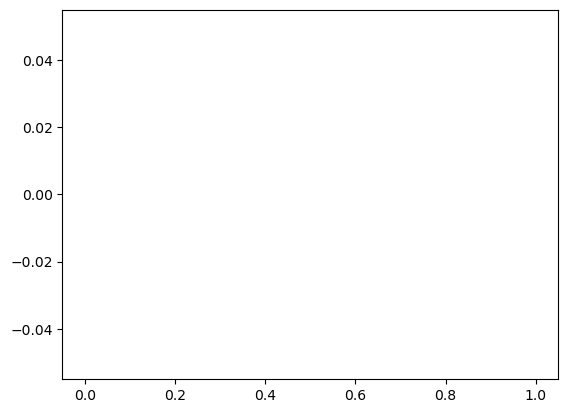

In [53]:
tindex1 = np.where(CZT_nrg_chk>0)
CZT_nrg_chka = CZT_nrg_chk[tindex1]
plt.hist(CZT_nrg_chka,bins=50)

In [54]:
trk_evtid= f['Events/TKR/EventID'][...]
trk_energy = f['Events/TKR/Energy'][...]
print(trk_evtid.shape, trk_energy.shape)

(106337,) (111066, 6)


In [55]:
Trk_nrg = trk_energy[:,4][...] # Individual Hit
Trk_ind_evtid = trk_energy[:,0][...]

In [56]:
unique_nrgid, counts = np.unique(Trk_ind_evtid, return_counts=True) # get unique eventid and the no. of counts
unique_nrgid.shape[0]

64263

In [57]:
new_Trk_nrg = np.zeros(shape=(unique_nrgid.shape[0],max(counts)))
#NOTE THIS STEP TAKES A WHILE...
for i in range(unique_nrgid.shape[0]):
    t_loc = np.where( unique_nrgid[i]==Trk_ind_evtid)
    t_nrg = np.array(Trk_nrg[t_loc[0]])
    t_nrg.resize((max(counts),))
    new_Trk_nrg[i] = t_nrg

In [58]:
Trk_nrg_arr = new_Trk_nrg
Trk_nrg_sum_arr = Trk_nrg_arr.sum(axis = tuple(range(1,2)))

In [59]:
# Now we have tracker and CZT. need to find id with CZT...

In [60]:
a, b, c = np.intersect1d(unique_nrgid, CZT_nrg_chk_id, return_indices=True)

In [61]:
unique_nrgid.shape, CZT_nrg_chk_id.shape, b.shape, c.shape, a.shape

((64263,), (82388,), (52294,), (52294,), (52294,))

In [62]:
Trk_sel_nrg = Trk_nrg_sum_arr[b]

(array([4.270e+02, 3.342e+03, 4.806e+03, 5.335e+03, 5.203e+03, 4.782e+03,
        4.544e+03, 4.625e+03, 4.406e+03, 3.983e+03, 3.518e+03, 2.284e+03,
        9.920e+02, 5.660e+02, 3.940e+02, 3.210e+02, 2.960e+02, 2.510e+02,
        2.550e+02, 2.070e+02, 2.110e+02, 1.870e+02, 1.690e+02, 1.540e+02,
        1.470e+02, 1.340e+02, 7.900e+01, 9.500e+01, 7.800e+01, 7.600e+01,
        7.100e+01, 6.600e+01, 4.900e+01, 2.800e+01, 3.300e+01, 2.000e+01,
        2.300e+01, 2.100e+01, 1.400e+01, 1.000e+01, 1.000e+01, 1.000e+01,
        8.000e+00, 1.300e+01, 7.000e+00, 4.000e+00, 4.000e+00, 7.000e+00,
        3.000e+00, 2.000e+00, 6.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

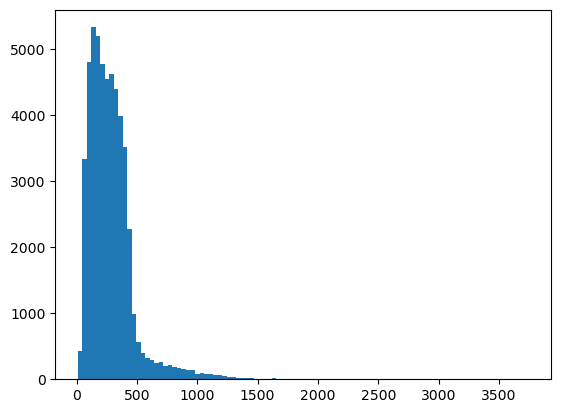

In [64]:
plt.hist(Trk_sel_nrg, bins=100)

In [67]:
unique_nrgid.shape, counts.shape

((64263,), (64263,))

(array([4.5166e+04, 4.4770e+03, 1.2080e+03, 6.7600e+02, 3.6500e+02,
        2.3100e+02, 1.0700e+02, 4.2000e+01, 1.4000e+01, 8.0000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

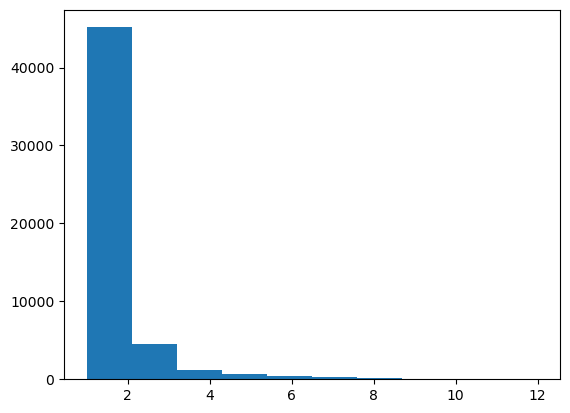

In [71]:
plt.hist(counts[b],bins=10)